# LAB 1: Image Enhancing

## EXERCICE 1: 
    Summarise the concepts and Python (and NumPy) functions used in this lab that are (more) novel for you. The purpose is that this helps you understand and internalise them, and it serves as a later reference as well. Try to organise this summary by category (e.g., NumPy, PIL, Matplotlib), and do it as much visual and quick to consult as possible.



I'm already somehow familiarized with those libraries to some extent, so I didn't need to look for anything up for this specific LAB session

## EXERCICE 2: 
    In the provided code, we save an image to disk using several lines of code. Replace those lines by a single one with the same functionality by defining and calling a function saveImg(). Decide which parameters this function should have.



First, I will paste the code here, divided in *methods* and "the program code". For that, and since I wanted the code to be splittable in two code blocks, i had to give some parameters to the `doTests()` method 

In [75]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from PIL import Image
import numpy as np
import glob
import os
import visualPercepUtils as vpu

def histeq(im, nbins=256):
    imhist, bins = np.histogram(im.flatten(), list(range(nbins)), density=False)
    cdf = imhist.cumsum() # cumulative distribution function (CDF) = cummulative histogram
    factor = 255 / cdf[-1]  # cdf[-1] = last element of the cummulative sum = total number of pixels)
    im2 = np.interp(im.flatten(), bins[:-1], factor*cdf)
    return im2.reshape(im.shape), cdf

def testHistEq(im):
    im2, cdf = histeq(im)
    return [im2, cdf]

def darkenImg(im,p=2):
    return (im ** float(p)) / (255 ** (p - 1)) # try without the float conversion and see what happens

def brightenImg(im,p=2):
    return np.power(255.0 ** (p - 1) * im, 1. / p)  # notice this NumPy function is different to the scalar math.pow(a,b)


def testDarkenImg(im):
    im2 = darkenImg(im,p=2) #  Is "p=2" different here than in the function definition? Can we remove "p=" here?
    return [im2]


def testBrightenImg(im):
    p=2
    im2=brightenImg(im,p)
    return [im2]

def doTests(files: list[str], path_output:str, tests: list[str], nameTests:dict[str: str], 
            suffixFiles: dict[str, str], bSaveResultImgs: bool):
    print("Testing on", files)
    for imfile in files:
        im = np.array(Image.open(imfile).convert('L'))  # from Image to array
        for test in tests:
            out = eval(test)(im)
            im2 = out[0]
            vpu.showImgsPlusHists(im, im2, title=nameTests[test])
            if len(out) > 1:
                vpu.showPlusInfo(out[1],"cumulative histogram" if test=="testHistEq" else None)
            if bSaveResultImgs:
                dirname,basename = os.path.dirname(imfile), os.path.basename(imfile)
                fname, fext = os.path.splitext(basename)
                #print(dname,basename)
                pil_im = Image.fromarray(im2.astype(np.uint8))  # from array to Image
                pil_im.save(path_output+'//'+fname + suffixFiles[test] + fext)


Testing on ['./imgs-P1\\cabeza.pgm', './imgs-P1\\huesos.pgm', './imgs-P1\\iglesia.pgm']
4 None None


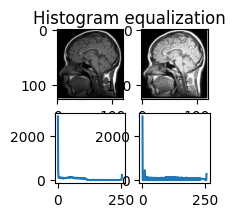

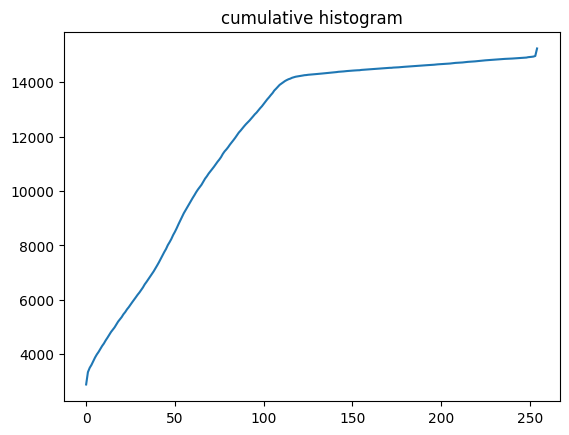

4 None None


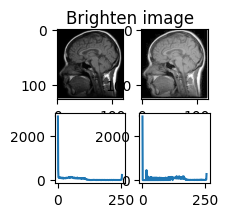

4 None None


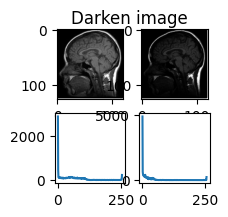

4 None None


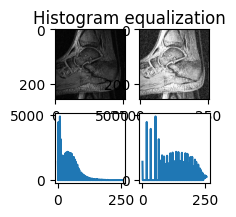

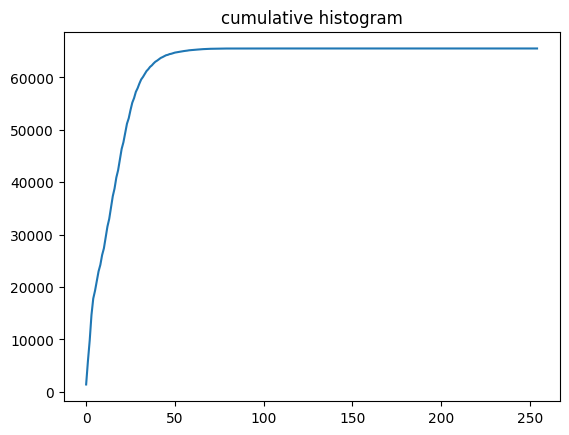

4 None None


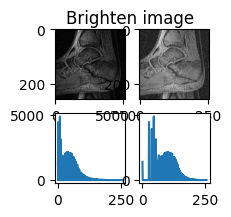

4 None None


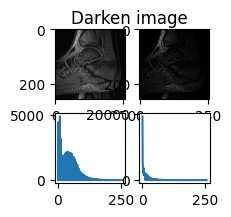

4 None None


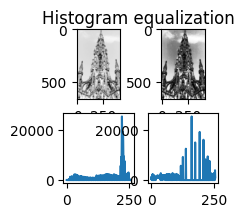

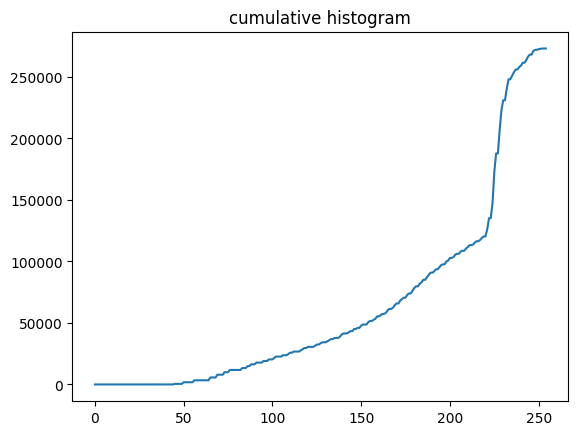

4 None None


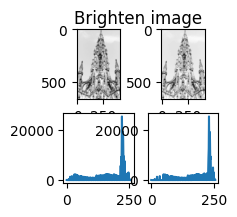

4 None None


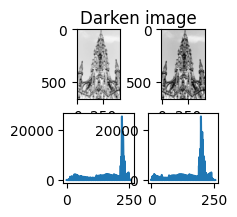

In [76]:
path_input = './imgs-P1/'
path_output = './imgs-out-P1/'
bAllFiles = True
if bAllFiles:
    files = glob.glob(path_input + "*.pgm")
else:
    files = [path_input + 'iglesia.pgm'] # iglesia,huesos

bAllTests = True
if bAllTests:
    tests = ['testHistEq', 'testBrightenImg', 'testDarkenImg']
else:
    tests = ['testHistEq']#['testBrightenImg']
nameTests = {'testHistEq': "Histogram equalization",
             'testBrightenImg': 'Brighten image',
             'testDarkenImg': 'Darken image'}
suffixFiles = {'testHistEq': '_heq',
               'testBrightenImg': '_br',
               'testDarkenImg': '_dk'}

bSaveResultImgs = True

doTests(files, path_output, tests, nameTests, suffixFiles, bSaveResultImgs)



As you can see, code still runs as expected

Next, I will declare a method for saving the image and substitute the lines in charge of saving that image for that method:

In [77]:
def saveImg(im, workingPath, savePath, suffix):
    dirname, basename = os.path.dirname(workingPath), os.path.basename(workingPath)
    fname, fext = os.path.splitext(basename)
    #print(dname,basename)
    pil_im = Image.fromarray(im.astype(np.uint8))  # from array to Image
    pil_im.save(savePath+'//'+fname + suffix + fext)

def doTests(files: list[str], path_output:str, tests: list[str], nameTests:dict[str: str], 
            suffixFiles: dict[str, str], bSaveResultImgs: bool):
    print("Testing on", files)
    for imfile in files:
        im = np.array(Image.open(imfile).convert('L'))  # from Image to array
        for test in tests:
            out = eval(test)(im)
            im2 = out[0]
            vpu.showImgsPlusHists(im, im2, title=nameTests[test])
            if len(out) > 1:
                vpu.showPlusInfo(out[1],"cumulative histogram" if test=="testHistEq" else None)
            if bSaveResultImgs:
                saveImg(im2, imfile, path_output, suffixFiles[test])

After redefining those methods, we will call the code again (no changes)

Testing on ['./imgs-P1\\cabeza.pgm', './imgs-P1\\huesos.pgm', './imgs-P1\\iglesia.pgm']
4 None None


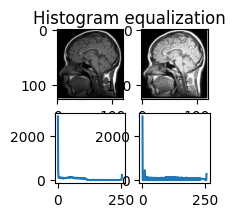

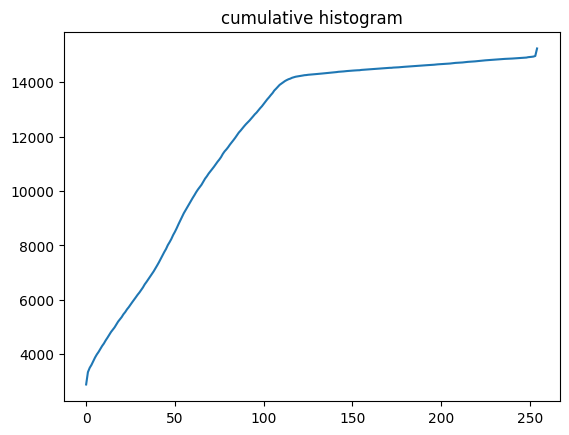

4 None None


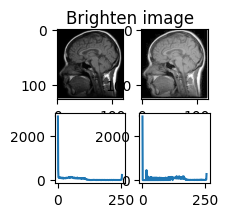

4 None None


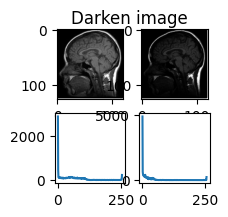

4 None None


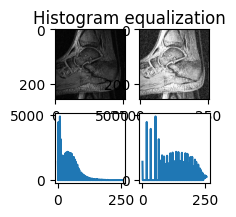

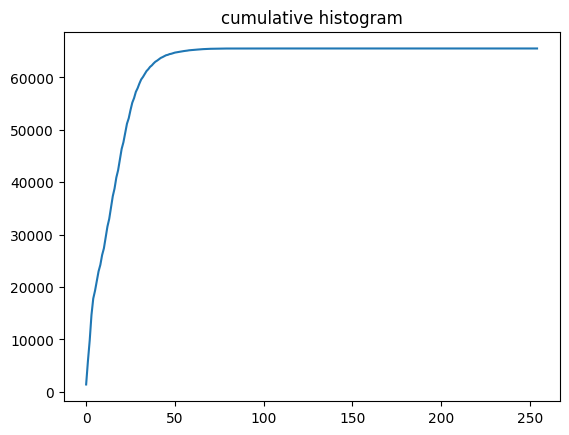

4 None None


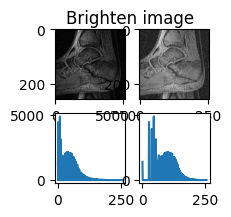

4 None None


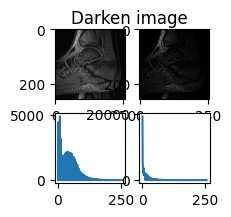

4 None None


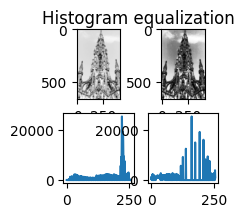

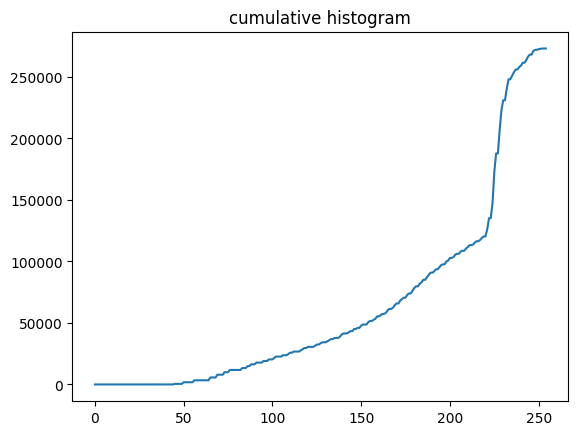

4 None None


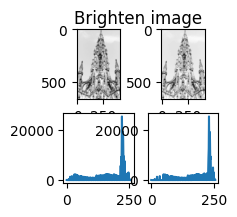

4 None None


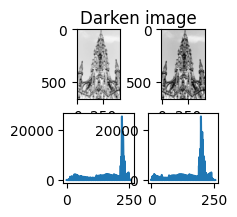

In [78]:
path_input = './imgs-P1/'
path_output = './imgs-out-P1/'
bAllFiles = True
if bAllFiles:
    files = glob.glob(path_input + "*.pgm")
else:
    files = [path_input + 'iglesia.pgm'] # iglesia,huesos

bAllTests = True
if bAllTests:
    tests = ['testHistEq', 'testBrightenImg', 'testDarkenImg']
else:
    tests = ['testHistEq']#['testBrightenImg']
nameTests = {'testHistEq': "Histogram equalization",
             'testBrightenImg': 'Brighten image',
             'testDarkenImg': 'Darken image'}
suffixFiles = {'testHistEq': '_heq',
               'testBrightenImg': '_br',
               'testDarkenImg': '_dk'}

bSaveResultImgs = True

doTests(files, path_output, tests, nameTests, suffixFiles, bSaveResultImgs)



As you can see, everything works as before and as intended

## EXERCICE 3
    Generalize the brightening function, brightenImg() so that it works both with gray-level and color images. You can treat each color band as if it was a single graylevel image. Do not forget to display the resulting image and saving it to disk. You may try this function on images that are previously darkened with darkenImg(), which you may also generalise.

Redefining the brightenImg method:

In [79]:
def brightenImg(im,p=2):
    if len(im.shape) > 2: # if image has 3 dimensions, consider the last one as the number of channels
        im_edit = im.copy()
        for chan in range(im.shape[2]): # foreach channel
            im_edit[:,:,chan] = np.power(255.0 ** (p - 1) * im_edit[:,:,chan], 1. / p)
        return im_edit        
    else:
        return np.power(255.0 ** (p - 1) * im, 1. / p)

Now I will change how the image gets loaded by PIL:

Before, image was converted to LUMA/Luminosity channel:
`im = np.array(Image.open(imfile).convert('L'))`

And i changed it so it gets loaded as is (line 5 from the block below) :

In [80]:

def doTests(files: list[str], path_output:str, tests: list[str], nameTests:dict[str: str], 
            suffixFiles: dict[str, str], bSaveResultImgs: bool):
    print("Testing on", files)
    for imfile in files:
        im = np.array(Image.open(imfile))  # from Image to array
        for test in tests:
            out = eval(test)(im)
            im2 = out[0]
            vpu.showImgsPlusHists(im, im2, title=nameTests[test])
            if len(out) > 1:
                vpu.showPlusInfo(out[1],"cumulative histogram" if test=="testHistEq" else None)
            if bSaveResultImgs:
                saveImg(im2, imfile, path_output, suffixFiles[test])

After redefining this method, let's try the code on some PPM images. I changed *line 5* so it also gets the "*.ppm*" images from the source folder, and changed the definition of the variable `tests` so it only runs the brightening test for convenience:

Testing on ['./imgs-P1\\cabeza.pgm', './imgs-P1\\huesos.pgm', './imgs-P1\\iglesia.pgm', './imgs-P1\\couple.ppm', './imgs-P1\\girl.ppm', './imgs-P1\\jelly_beans.ppm', './imgs-P1\\peppers.ppm', './imgs-P1\\toys.ppm', './imgs-P1\\tree.ppm']
4 None None


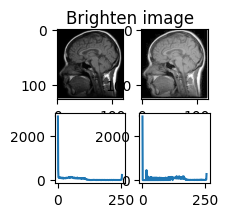

4 None None


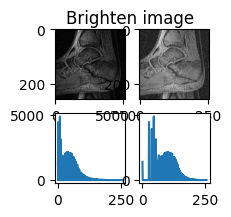

4 None None


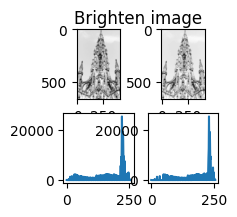

4 None None


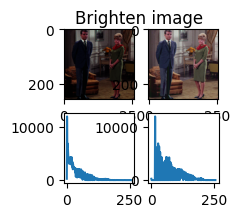

4 None None


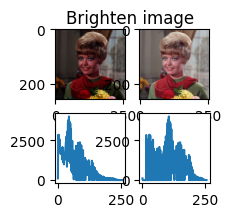

4 None None


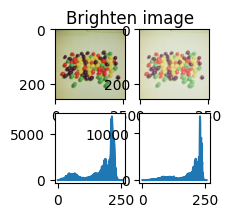

4 None None


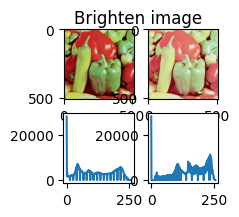

4 None None


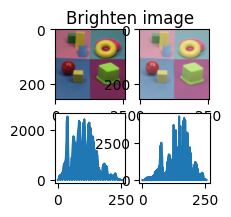

4 None None


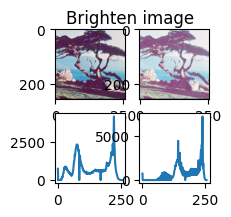

In [81]:
path_input = './imgs-P1/'
path_output = './imgs-out-P1/'
bAllFiles = True
if bAllFiles:
    files = glob.glob(path_input + "*.pgm") + glob.glob(path_input + "*.ppm")
else:
    files = [path_input + 'iglesia.ppm'] # iglesia,huesos

bAllTests = True
if bAllTests:
    tests = ['testBrightenImg']
else:
    tests = ['testHistEq']#['testBrightenImg']
nameTests = {'testHistEq': "Histogram equalization",
             'testBrightenImg': 'Brighten image',
             'testDarkenImg': 'Darken image'}
suffixFiles = {'testHistEq': '_heq',
               'testBrightenImg': '_br',
               'testDarkenImg': '_dk'}

bSaveResultImgs = True

doTests(files, path_output, tests, nameTests, suffixFiles, bSaveResultImgs)



As you can see, the method can be used both for 3 channels as for single-channel images

## Exercice 4:
    Write a function checkBoardImg(im,m,n) which, given a gray-level image im, it creates an image of the same size and same contents, but which inverts the pixels or not, alternatively, following a checkboard pattern where the image is partitioned into m×n cells, as illustrated in Fig. 1. Then check for the proper operation of this function with the assistance of an additional function, testCheckBoard() that calls checkBoardImg() for one of the available images and for some particular number of cells. You can use the provided showInGrid(), to display the results. Reuse the function saveImg() to save the resulting image.

*The method is detailed inside its docstring*:

First, we get the size of the image (first two places in the `.shape`)
Then, to get the kernel size, we divide te rows between M segments and the columns between N segments. Those will define our regions
I will iterate for _row in range (number of rows) and with _col in range n (number of columns). That way, each region of the checkerboard will cover:
-  Rows between [_row * segment_height: (_row + 1) * segment_height]
-  Columns between [_col * segment_width: (_col + 1) * segment_width]

I will determine if the square should be inverted by checking if the sum of each region's column index and row index is even or odd:


| i   | c0          | c1          | c2         | c3          |
| --- | ----------- | ----------- | ---------- | ----------- |
| r0  | **0+0 =0**  | 0+1=1       | **0+2=2**  | 0+3 = 3     |
| r1  | 1+0 =0      | **1+1 = 2** | 1+2 =3     | **1+3 = 4** |
| r2  | **2+0 = 2** | 2+1 = 3     | **2+2 =4** | 2+3 = 5     |
| r3  | 3+0 = 3     | **3+1 = 4** | 3+2 = 5    | **3+3=6**   |

As you can see, the even results (**bold**) of that computation form a checkerboard pattern


In [82]:
def checkBoardImage(im, m, n) -> np.ndarray:
    """Method for inverting alternating checkerboard squares in given image

    Args:
        im (np.array): Source image
        m (int): Number of rows
        n (int): Number of columns
    
    Returns:
        np.ndarray: Processed image
    """
    
    p_im = im.copy()
    
    im_sizes = [im.shape[i] for i in range(len(im.shape))][:2]
    
    cell_sizes = [im_sizes[0]//m, im_sizes[1]//n]
    
    print(im_sizes, cell_sizes, (m,n))
    
    for _row in range(m):
        for _col in range(n):
            # for getting alternate columns, we will check if the sum of the selected col and the selected row is even or odd; if even, we will invert, else we will pass
            if (float(_row+_col) % 2 == 0): 
                # calculate row start and end
                _row_start = _row*cell_sizes[0]
                _row_end = (_row + 1)*cell_sizes[0]
                
                # calculate col start and end
                _col_start = _col*cell_sizes[1]
                _col_end = (_col + 1)*cell_sizes[1]
                
                # overflow protection
                if _row_start < 0: _row_start = 0
                if _col_start < 0: _col_start = 0
                if _row_end > im_sizes[0]: _row_end = im_sizes[0]
                if _col_end > im_sizes[1]: _col_end = im_sizes[1]
                
                # invert region
                p_im[_row_start:_row_end, _col_start:_col_end] = 255 - p_im[_row_start:_row_end, _col_start:_col_end]
    return p_im

def testCheckBoard(im):
    im2 = checkBoardImage(im, 5, 6)
    return [im2]


Then, i modified the code so it only ran the new `testCheckBoard()` test (including adding suffixes and names to dictionaries)

Testing on ['./imgs-P1\\cabeza.pgm', './imgs-P1\\huesos.pgm', './imgs-P1\\iglesia.pgm']
[127, 120] [25, 20] (5, 6)
4 None None


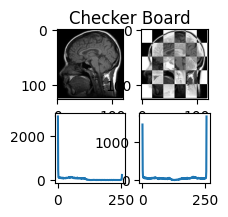

[256, 256] [51, 42] (5, 6)
4 None None


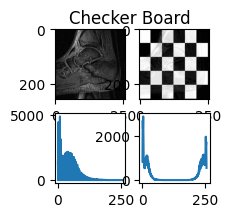

[663, 412] [132, 68] (5, 6)
4 None None


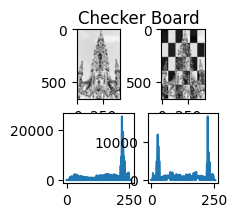

In [83]:

path_input = './imgs-P1/'
path_output = './imgs-out-P1/'
bAllFiles = True
if bAllFiles:
    files = glob.glob(path_input + "*.pgm")
else:
    files = [path_input + 'iglesia.pgm'] # iglesia,huesos

bAllTests = True
if bAllTests:
    tests = ['testCheckBoard']
else:
    tests = ['testHistEq']#['testBrightenImg']
nameTests = {'testHistEq': "Histogram equalization",
             'testBrightenImg': 'Brighten image',
             'testDarkenImg': 'Darken image',
             'testCheckBoard': "Checker Board"}
suffixFiles = {'testHistEq': '_heq',
               'testBrightenImg': '_br',
               'testDarkenImg': '_dk',
               'testCheckBoard': '_chkbd'}

bSaveResultImgs = True

doTests(files, path_output, tests, nameTests, suffixFiles, bSaveResultImgs)

## EXERCICE 5

    It is often convenient to process or represent images in a multi-level tree-like fashion. For instance, the first level considers the full image; the second level considers the four subimages corresponding to partitioning the original image into four quadrants, and so on until reaching a given number of levels. Write a function multiHist(im,n) that returns a list of gray-level histograms of image im corresponding to n levels. 
    Thus, if n = 1, the returned list will consist of a single histogram; if n = 2, the list will have 5 (1+4) histograms; if n = 3, it will have 21 (1+4+16) histograms, etc. 
    Assume the input image is a 2D NumPy array (not an Image object from PIL module). Again, you can use our showInGrid() function to help you develop or test the function. 
    As an example, with n = 2 and using 3-bin histograms (to simplify the console output), the result of our implementation of multiHist() on the image in Fig. 1a is, 
```
    [   array([ 25837,  53944,  193375]), 
        array([ 1811,   3782,   62593]), 
        array([ 3835,   7701,   56650]), 
        array([ 9006,   19530,  39856]), 
        array([ 10921,  21955,  35516])     ]
```